## Model 1: Random Forest / Decision Tree

In [47]:
# Update sklearn
#!pip install sklearn --upgrade
# Install joblib
#!pip install joblib
# !pip install seaborn

     |████████████████████████████████| 285 kB 3.6 MB/s eta 0:00:01


In [3]:
# Import dependencies
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [4]:
# Load in exoplanet data
planets_df = pd.read_csv("resources/exoplanet_data.csv")
planets_df

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,FALSE POSITIVE,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,FALSE POSITIVE,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,CANDIDATE,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,...,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,FALSE POSITIVE,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [5]:
# Show all columns
planets_df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

In [6]:
# Drop null columns & rows
planets_df = planets_df.dropna(axis='columns', how='all')
planets_df = planets_df.dropna(how="any")
planets_df

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,FALSE POSITIVE,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,FALSE POSITIVE,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,CANDIDATE,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,...,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,FALSE POSITIVE,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


## Select Features

In [7]:
# Define X
X = planets_df.drop("koi_disposition", axis=1)
# Define y
y = planets_df["koi_disposition"]
print(X.shape, y.shape)

(6991, 40) (6991,)


In [8]:
# Feature selection & remove unnecessary features (feature importance below 0)
X = planets_df.drop(['koi_disposition', 'koi_srad', 'koi_steff', 'koi_slogg', 'koi_slogg_err1', 'koi_srad_err2', 'koi_tce_plnt_num'], axis=1)
print(X.shape)


(6991, 34)


## Pre-Processing

## Train, Test, Split

In [9]:
# Separate the data into training & testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [10]:
# Show rows for training
X_train

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_steff_err1,koi_steff_err2,koi_slogg_err2,koi_srad_err1,ra,dec,koi_kepmag
6122,0,0,0,0,6.768901,7.380000e-05,-7.380000e-05,133.077240,0.008440,-0.008440,...,204.89,-103.87,10.8,154,-171,-0.187,0.310,294.40472,39.351681,14.725
6370,0,1,0,1,0.733726,6.060000e-06,-6.060000e-06,132.020050,0.007950,-0.007950,...,2253.61,-677.78,13.8,158,-175,-0.187,0.211,284.50391,42.463860,15.770
2879,1,0,0,0,7.652707,6.540000e-05,-6.540000e-05,134.460380,0.006190,-0.006190,...,195.16,-64.34,254.3,151,-189,-0.200,0.290,295.50211,38.983540,13.099
107,0,0,0,0,7.953547,1.910000e-05,-1.910000e-05,174.662240,0.001820,-0.001820,...,7.15,-10.12,38.4,76,-85,-0.016,0.023,291.15878,40.750271,15.660
29,0,0,0,0,4.959319,5.150000e-07,-5.150000e-07,172.258529,0.000083,-0.000083,...,146.52,-93.21,696.5,77,-77,-0.110,0.173,292.16705,48.727589,15.263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,1,0,0,8.268081,6.340000e-07,-6.340000e-07,135.056330,0.000064,-0.000064,...,113.80,-37.92,1320.5,156,-190,-0.200,0.273,292.53125,46.728699,15.768
5191,0,0,0,0,11.161938,1.677000e-04,-1.677000e-04,133.553800,0.013000,-0.013000,...,163.60,-142.69,13.4,124,-124,-0.101,0.281,295.21268,49.562180,13.374
5226,0,1,0,0,6.150251,7.000000e-07,-7.000000e-07,134.422825,0.000088,-0.000088,...,6163.40,-4172.88,471.0,246,-458,-0.180,0.988,297.18176,45.988441,10.622
5390,1,0,0,0,3.343285,4.380000e-05,-4.380000e-05,134.845100,0.011200,-0.011200,...,2293.97,-2861.36,79.5,177,-197,-0.098,0.433,296.86258,41.147419,13.276


### Min Max Scaler (x)

In [11]:
# MinMaxScaler: scale the numerical data
# Define the scaler
X_scaler = MinMaxScaler().fit(X_train)

# Transform x train & test (with scaler)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### One Hot Encoding (y)

### Canidate: 0
### Confirmed: 1
### False Positive: 2

In [12]:
# Encode labels for y: "KOI disposition"
label_encoder = LabelEncoder()

# Train the encoder
label_encoder.fit(y_train)

# Encoded y train & test
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [13]:
# One hot encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [14]:
# See the categories
y_train_categorical

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

## Create & Train the Model

### Random Forest:

In [15]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=400)
# Fit the model
rf = rf.fit(X_train_scaled, y_train)
# Score the model
print("Training Score: ", rf.score(X_train_scaled, y_train))
print("Testing Score: ", rf.score(X_test_scaled, y_test))

Training Score:  1.0
Testing Score:  0.8993135011441648


In [16]:
# Print out success report of features
feature_names = X.columns
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.1081614123088531, 'koi_fpflag_co'),
 (0.09924682228134503, 'koi_fpflag_nt'),
 (0.06406324933034376, 'koi_fpflag_ss'),
 (0.05636624867322534, 'koi_model_snr'),
 (0.046954189756865605, 'koi_prad'),
 (0.03836001366707649, 'koi_duration_err1'),
 (0.03515260176672256, 'koi_prad_err1'),
 (0.03483963770017275, 'koi_fpflag_ec'),
 (0.033592735474586986, 'koi_duration_err2'),
 (0.03268342297395403, 'koi_steff_err2'),
 (0.03251418013344216, 'koi_steff_err1'),
 (0.032464972803108845, 'koi_prad_err2'),
 (0.025187009065116416, 'koi_depth'),
 (0.024817269309203843, 'koi_period'),
 (0.024459250779405656, 'koi_time0bk_err1'),
 (0.024106344073143767, 'koi_duration'),
 (0.02407836724646091, 'koi_time0bk_err2'),
 (0.021111914697935594, 'koi_period_err1'),
 (0.02021188734675633, 'koi_impact'),
 (0.019593189904041623, 'koi_period_err2'),
 (0.018564861124994374, 'koi_insol_err1'),
 (0.01838063211651791, 'koi_teq'),
 (0.01582197436205604, 'koi_depth_err2'),
 (0.015204721937043014, 'koi_insol'),
 (0.015157

## Hyperparameter Tuning

In [32]:
# GridSearchCV: tune model parameters
from sklearn.model_selection import GridSearchCV

parameters = { 'n_estimators': [200, 300, 400, 500] }
grid = GridSearchCV(rf, parameters, verbose=3)

In [33]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ..................n_estimators=200;, score=0.902 total time=   4.2s
[CV 2/5] END ..................n_estimators=200;, score=0.908 total time=   4.1s
[CV 3/5] END ..................n_estimators=200;, score=0.886 total time=   4.1s
[CV 4/5] END ..................n_estimators=200;, score=0.874 total time=   4.0s
[CV 5/5] END ..................n_estimators=200;, score=0.883 total time=   4.3s
[CV 1/5] END ..................n_estimators=300;, score=0.902 total time=   8.7s
[CV 2/5] END ..................n_estimators=300;, score=0.907 total time=   6.3s
[CV 3/5] END ..................n_estimators=300;, score=0.884 total time=   6.4s
[CV 4/5] END ..................n_estimators=300;, score=0.880 total time=   5.6s
[CV 5/5] END ..................n_estimators=300;, score=0.881 total time=   5.5s
[CV 1/5] END ..................n_estimators=400;, score=0.902 total time=   7.6s
[CV 2/5] END ..................n_estimators=400;,

GridSearchCV(estimator=RandomForestClassifier(n_estimators=400),
             param_grid={'n_estimators': [200, 300, 400, 500]}, verbose=3)

In [34]:
# Print out results
print("Best Parameters: ", grid.best_params_)
print("Best Score: ", grid.best_score_)

Best Parameters:  {'n_estimators': 300}
Best Score:  0.8905167771559974


In [35]:
# Predict with test data
predictions = grid.predict(X_test_scaled)

## Confusion Matrix:

In [52]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

[[313  82  16]
 [ 66 410   8]
 [  2   1 850]]


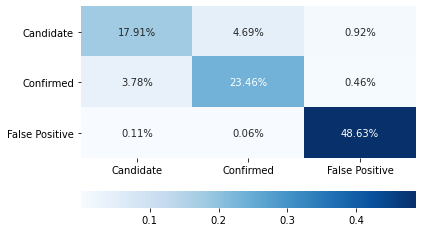

In [65]:
import seaborn as sns
import numpy as np
categories=["Candidate", "Confirmed", "False Positive"]
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=categories, yticklabels=categories, 
            cbar_kws={"orientation": "horizontal"})

In [67]:
# See the test values (predict vs actual)
predict_vs_actual = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
predict_vs_actual.head(15)

,Prediction,Actual
4982,FALSE POSITIVE,FALSE POSITIVE
4866,CANDIDATE,CANDIDATE
2934,FALSE POSITIVE,FALSE POSITIVE
5007,FALSE POSITIVE,FALSE POSITIVE
3869,FALSE POSITIVE,FALSE POSITIVE
233,CONFIRMED,CONFIRMED
1554,CONFIRMED,CANDIDATE
6156,CANDIDATE,CANDIDATE
4874,CANDIDATE,CANDIDATE
4844,FALSE POSITIVE,FALSE POSITIVE


In [36]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["Candidate", "Confirmed", "False Positive"]))

                precision    recall  f1-score   support

     Candidate       0.82      0.76      0.79       411
     Confirmed       0.83      0.85      0.84       484
False Positive       0.97      1.00      0.98       853

      accuracy                           0.90      1748
     macro avg       0.88      0.87      0.87      1748
  weighted avg       0.90      0.90      0.90      1748



## Save the Model

In [37]:
import joblib
filename = 'models/julia_brunett.sav'
joblib.dump(grid, filename)

['models/julia_brunett.sav']

## Load Model back to check:

In [38]:
# Load the model
exoplanets_model = joblib.load("models/julia_brunett.sav")

In [39]:
# Score the model (after loading back)
exoplanets_model.score(X_test_scaled, y_test)

0.8998855835240275